# Zadanie 11 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Zadanie 11
- Mapy samoorganizujące się Kohonena (SOM).
- Wizualizacja mapy na przykładzie zbioru danych Iris.

In [2]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
dataset = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].to_numpy()

### Gatunki

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
setosa = df[df['Species'].str.contains('Iris-setosa')]
versicolor = df[df['Species'].str.contains('Iris-versicolor')]
virginica = df[df['Species'].str.contains('Iris-virginica')]

### Ustawienia uruchamiania

In [355]:
k = 3
max_iterations = 100

### Wizualizacja zbioru

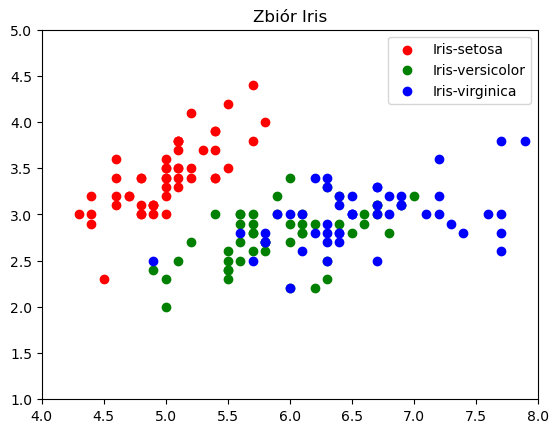

In [55]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], color='red', marker='o', label='Iris-setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], color='green', marker='o', label='Iris-versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], color='blue', marker='o', label='Iris-virginica')
plt.xlim(4,8)
plt.ylim(1,5)
plt.legend()
plt.title('Zbiór Iris')
plt.show()

### Uruchomienie algorytmu K-means

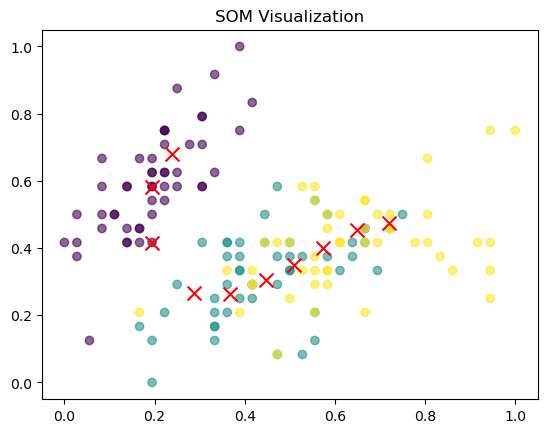

In [9]:
from sklearn.preprocessing import MinMaxScaler

def initialize_weights(input_size, map_size):
    return np.random.rand(map_size, input_size)

def update_weights(weights, input_vector, winner_index, learning_rate, sigma):
    for i in range(weights.shape[0]):
        distance = np.abs(i - winner_index)
        influence = np.exp(-distance**2 / (2 * sigma**2))
        weights[i] += learning_rate * influence * (input_vector - weights[i])

def som_train(data, map_size, epochs, learning_rate_initial, sigma_initial):
    input_size = data.shape[1]
    weights = initialize_weights(input_size, map_size)

    for epoch in range(epochs):
        for i in range(data.shape[0]):
            input_vector = data[i]
            winner_index = np.argmin(np.linalg.norm(weights - input_vector, axis=1))
            update_weights(weights, input_vector, winner_index, learning_rate_initial, sigma_initial)

        # Decay learning rate and sigma over time
        learning_rate = learning_rate_initial * np.exp(-epoch / epochs)
        sigma = sigma_initial * np.exp(-epoch / epochs)

    return weights

def visualize_map(weights, data, target):
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(weights[:, 0], weights[:, 1], c='red', marker='x', s=100)
    plt.title('SOM Visualization')
    plt.show()

# Przygotowanie danych Iris
iris = load_iris()
data = iris.data
target = iris.target

# Normalizacja danych
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Parametry SOM
map_size = 10
epochs = 100
learning_rate_initial = 0.1
sigma_initial = 1.0

# Trening mapy SOM
weights = som_train(data, map_size, epochs, learning_rate_initial, sigma_initial)

# Wizualizacja mapy SOM na podstawie zbioru danych Iris
visualize_map(weights, data, target)

In [10]:
%pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10600 sha256=c6487e3426bdd194dac033776e094df193b44a5a6cff0c9c6e37625e8ed7a12d
  Stored in directory: c:\users\funko\appdata\local\pip\cache\wheels\c7\92\d2\33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.
